In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Maternal Health Risk Data Set.csv')
y = df["RiskLevel"]
X = df.drop(labels="RiskLevel", axis=1)


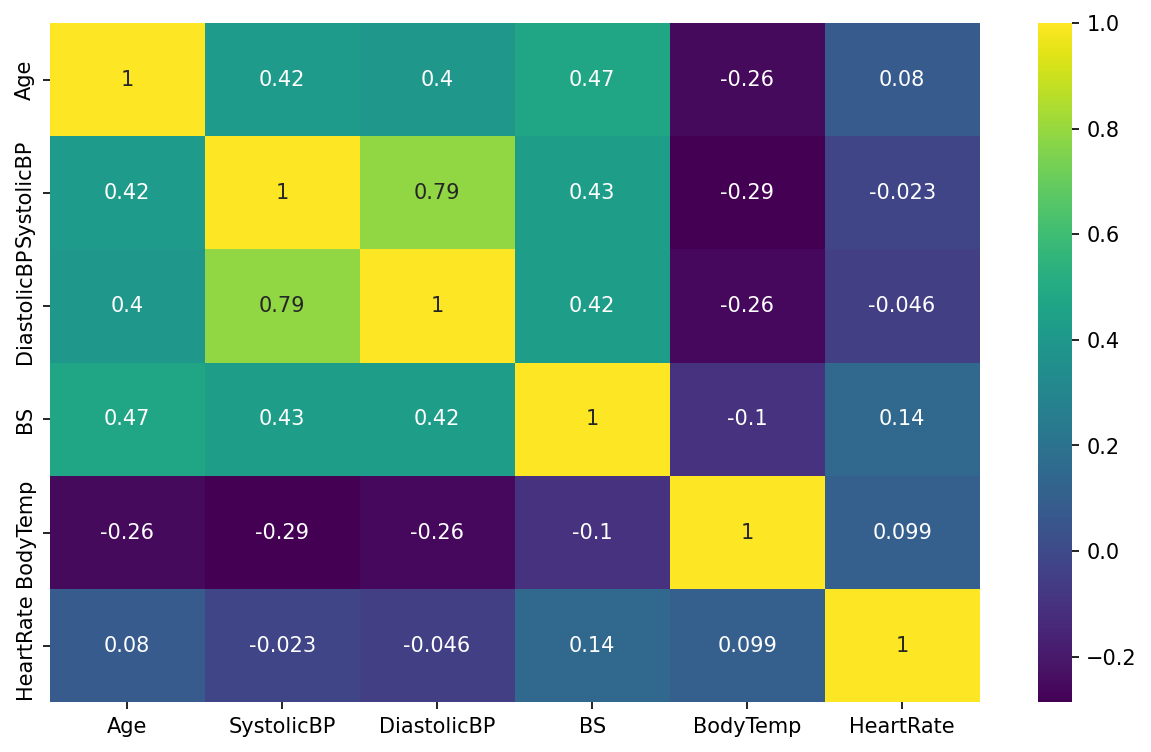

In [54]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

In [55]:

from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(["low risk", "mid risk", "high risk"])
preprocessing.LabelEncoder()


LabelEncoder()

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_test.count(), "\n", X_train.count())

Age            305
SystolicBP     305
DiastolicBP    305
BS             305
BodyTemp       305
HeartRate      305
dtype: int64 
 Age            709
SystolicBP     709
DiastolicBP    709
BS             709
BodyTemp       709
HeartRate      709
dtype: int64


C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


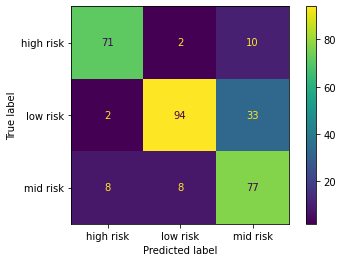

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

accuracy_list = []
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
rfm_pred = rfm.predict(X_test)
plot_confusion_matrix(rfm, X_test, y_test)
rfm_acc = accuracy_score(y_test, rfm_pred)
accuracy_list.append(rfm_acc * 100)
# print(classification_report(y_test, rfm_pred))

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


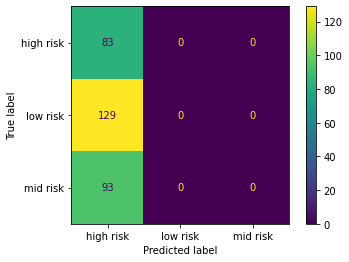

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_X_train, y_train)
knn_pred = knn.predict(scaled_X_test)
plot_confusion_matrix(knn, X_test, y_test)
knn_acc = accuracy_score(y_test, knn_pred)
accuracy_list.append(knn_acc * 100)
# print(classification_report(y_test, knn_pred))

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


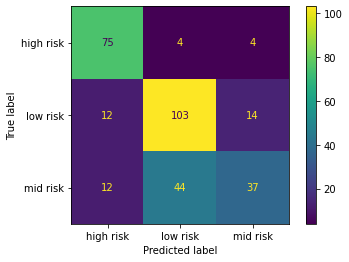

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
svc = SVC(decision_function_shape='ovo', class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid)
grid.fit(scaled_X_train, y_train)
svc_pred = grid.predict(scaled_X_test)
plot_confusion_matrix(grid, scaled_X_test, y_test)
svc_acc = accuracy_score(y_test, svc_pred)
accuracy_list.append(svc_acc * 100)

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


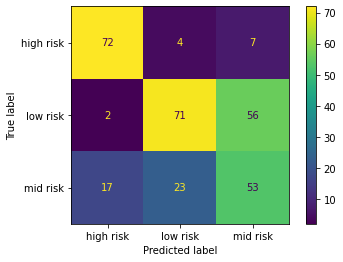

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
plot_confusion_matrix(clf_model, X_test, y_test)
clf_acc = accuracy_score(y_test, y_predict)
accuracy_list.append(clf_acc * 100)

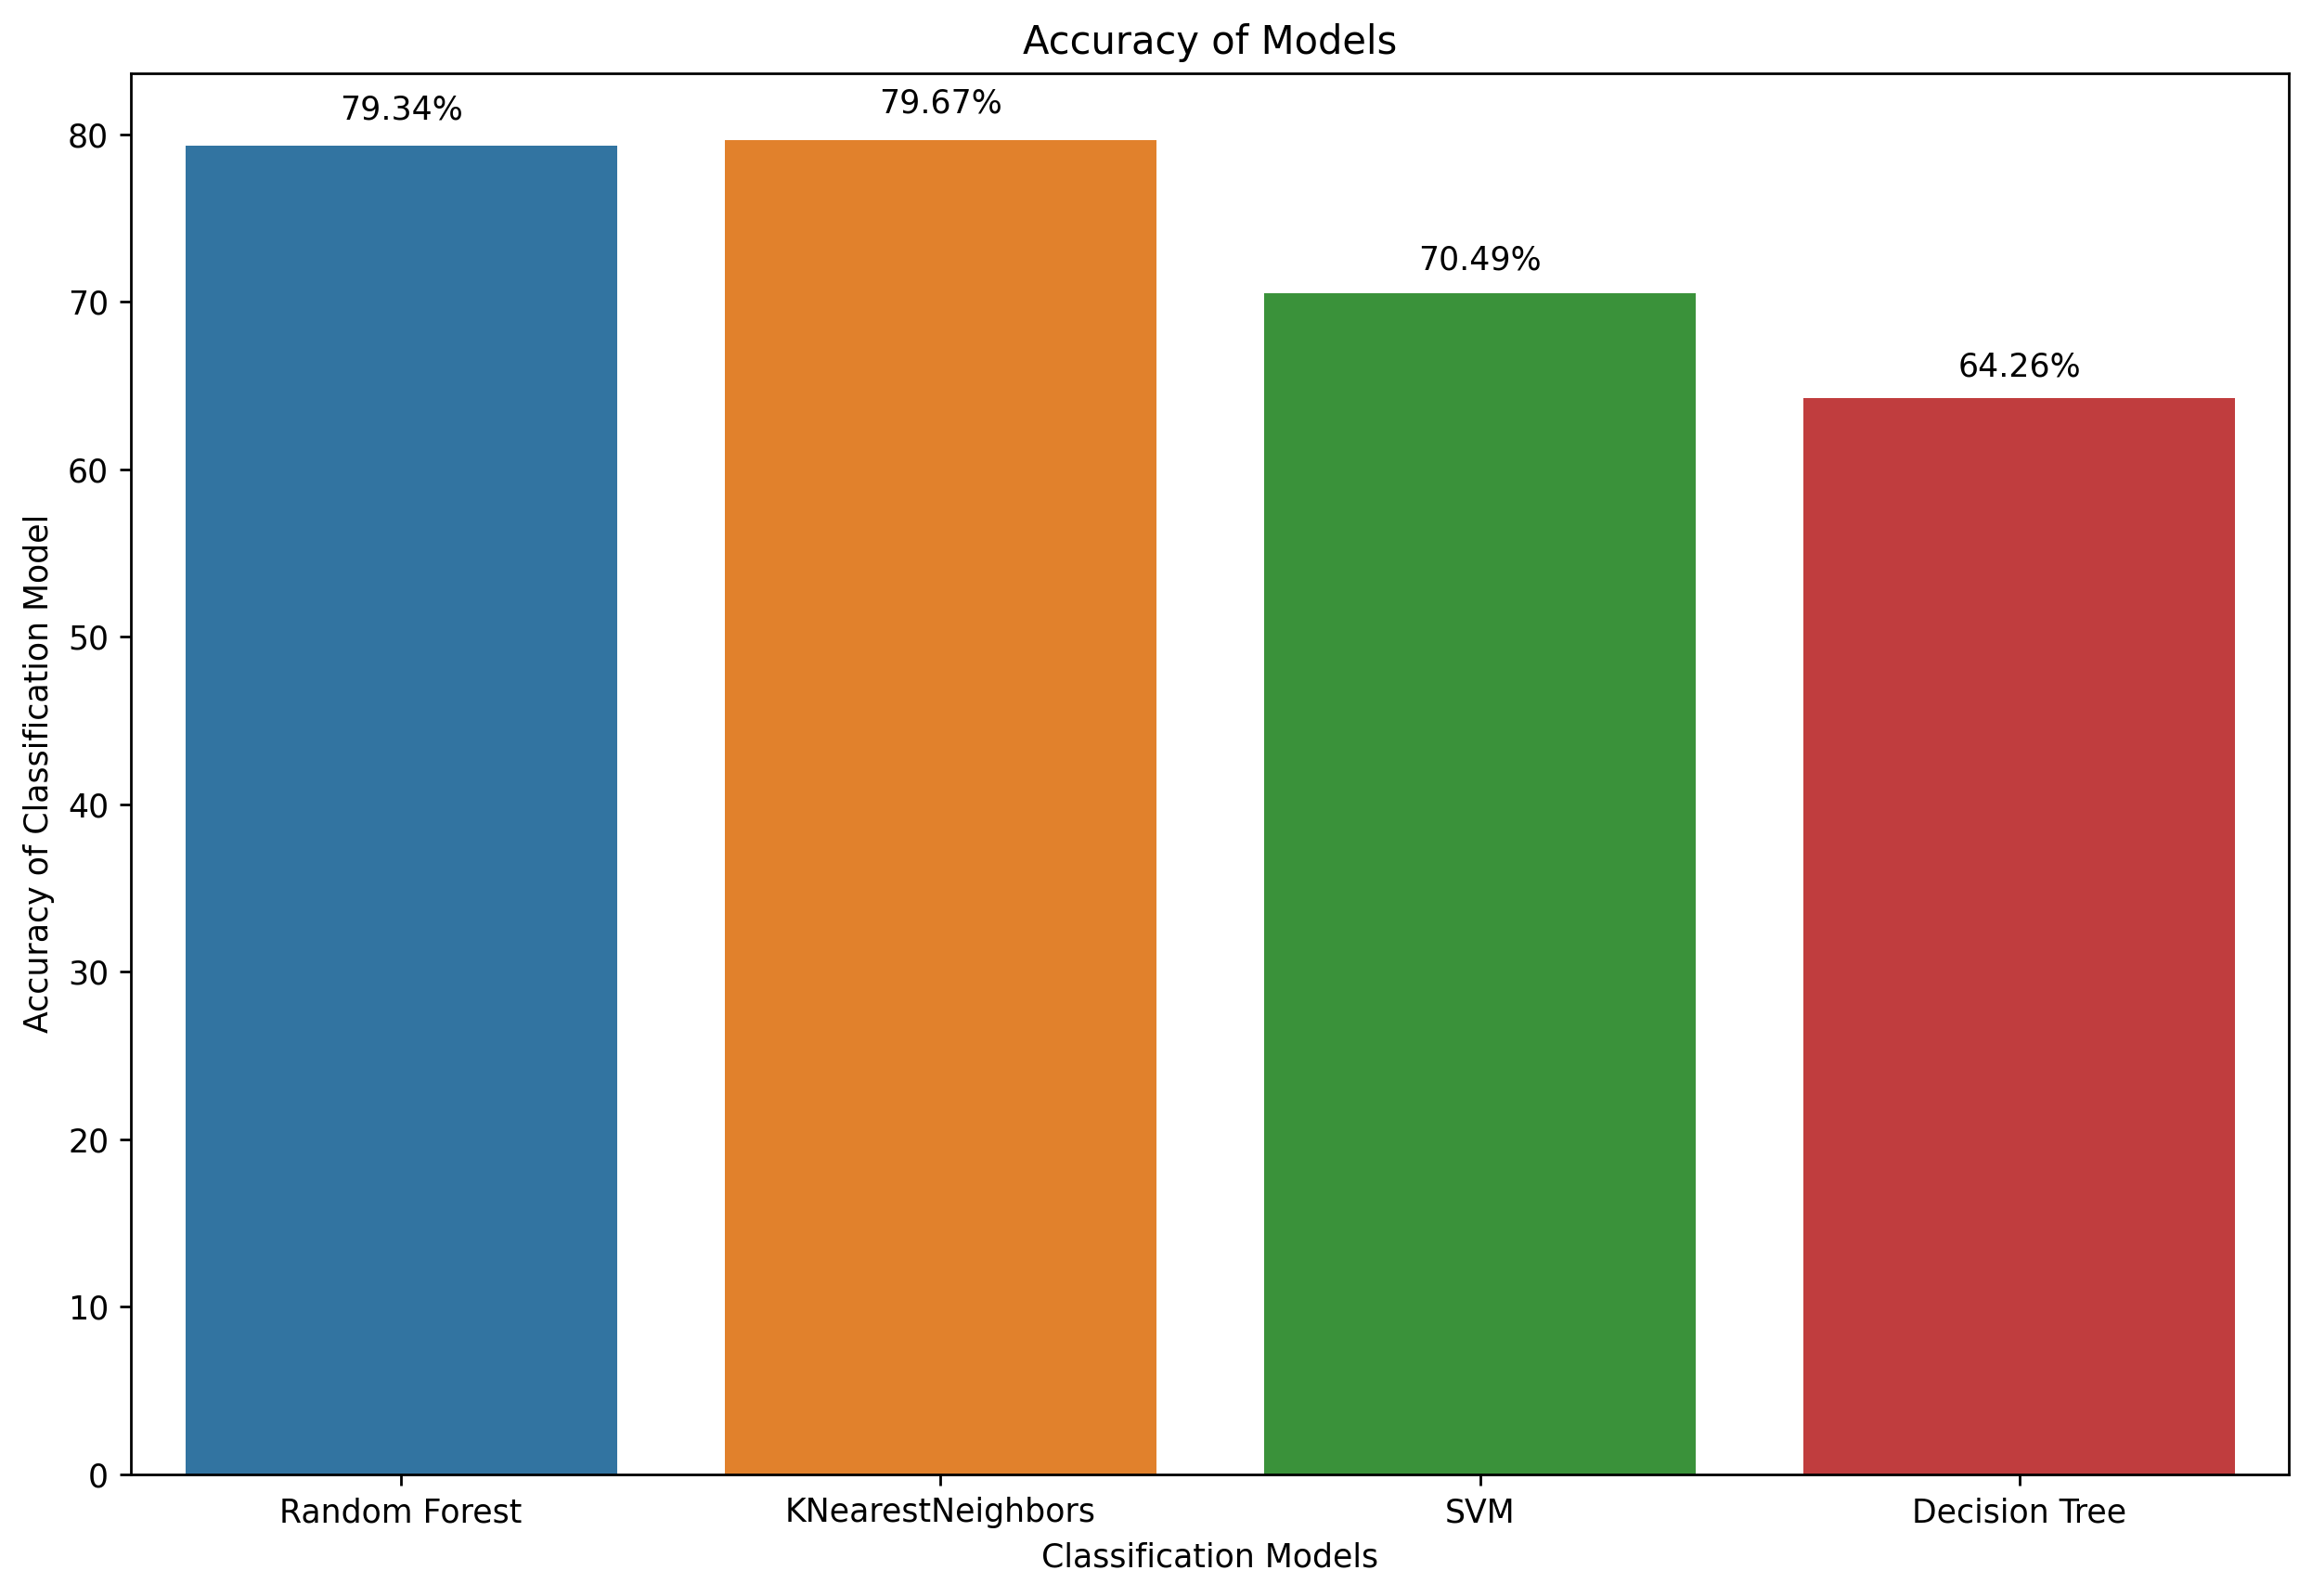

In [61]:
model_list = ["Random Forest", "KNearestNeighbors", "SVM","Decision Tree"]
plt.figure(figsize=(12,8), dpi=250)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()



In [49]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report
kf=KFold(n_splits=5)
score1=cross_val_score(rfm,X_train,y_train,cv=kf)
print("Random Forest: ", score1.mean())
print(classification_report(y_test, rfm_pred))
# print(classification_report(X_test, rfm_pred))

# kf2=KFold(n_splits=5)
score2=cross_val_score(knn,X_train,y_train,cv=kf)
print("KNN: ", score2.mean())
# print(classification_report(y_test, knn_pred))
# print(classification_report(X_test, knn_pred))

kf3=KFold(n_splits=5)
score3=cross_val_score(grid,X_train,y_train,cv=kf)
print("SVM: ", score3.mean())

kf4=KFold(n_splits=5)
score4=cross_val_score(clf_model,X_train,y_train,cv=kf)
print("Random Forest: ", score4.mean())

Random Forest:  0.8293177504744781
              precision    recall  f1-score   support

   high risk       0.85      0.80      0.83        82
    low risk       0.83      0.89      0.86       112
    mid risk       0.79      0.76      0.77       111

    accuracy                           0.82       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.82      0.82      0.82       305

KNN:  0.8152332434322245
SVM:  0.6981819998002198
Random Forest:  0.6572670062930777
